SVM的原理：  
https://windmising.gitbook.io/liu-yu-bo-play-with-machine-learning/di-shi-yi-zhang-zhi-cheng-xiang-liang-ji-svm

In [1]:
from SimpleSMO import SimpleSMO
from PlattSMO import PlattSMO
import utils
import kernel

# 简化版SMO算法

In [2]:
dataArr, labelArr = utils.loadDataSet('testSet.txt')
labelArr[:10]

array([-1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.])

Expect Result:  
array([-1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.])  

labelArr分为两类，分别是1和-1。  

In [3]:
%%time
simple = SimpleSMO(C = 0.6, toler = 0.001, maxIter = 40)
b,alphas = simple.train(dataArr, labelArr)
w = simple.get_w(alphas, dataArr, labelArr)

Wall time: 1.99 s


In [4]:
print ("w = ", w)
print ("b = ", b)
print ("alphas = ", alphas[alphas>0])
print ("support vectors = ")
# 打印支撑向量
for i in range(100):
    if alphas[i]>1e-3: print( dataArr[i],labelArr[i])

w =  [ 0.81425078 -0.27173749]
b =  -3.8372842889994776
alphas =  [[1.81241093e-02 3.42760235e-01 2.08166817e-17 1.39537210e-01
  2.21347134e-01]]
support vectors = 
[4.658191 3.507396] -1.0
[ 3.457096 -0.082216] -1.0
[ 5.286862 -2.358286] 1.0
[6.080573 0.418886] 1.0


w =  [ 0.81425078 -0.27173749]  
b =  -3.8372842889994776  
alphas =  [[1.81241093e-02 3.42760235e-01 2.08166817e-17 1.39537210e-01
  2.21347134e-01]]  
support vectors =   
[4.658191 3.507396] -1.0  
[ 3.457096 -0.082216] -1.0  
[ 5.286862 -2.358286] 1.0  
[6.080573 0.418886] 1.0

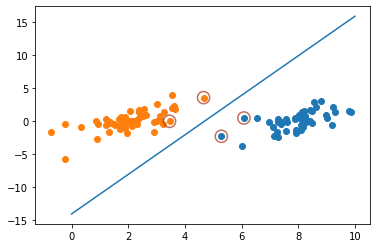

In [5]:
utils.showSMO(dataArr, labelArr, alphas, w, b)

# Platt加速的SMO算法

In [6]:
dataArr,labelArr = utils.loadDataSet('testSet.txt')
platt = PlattSMO(0.6, 0.001, 40)
oS = platt.train(dataArr, labelArr)

Expect Result:  

如果开启verbose，还可以看到以下内容  
iter: 1 i:99, pairs changed 4  
iter: 2 i:46, pairs changed 0  
iter: 3 i:99, pairs changed 5  
iter: 4 i:97, pairs changed 2  
iter: 5 i:97, pairs changed 1  
iter: 6 i:97, pairs changed 1  
iter: 7 i:97, pairs changed 4  
iter: 8 i:97, pairs changed 1  
iter: 9 i:97, pairs changed 2  
iter: 10 i:97, pairs changed 2  
iter: 11 i:97, pairs changed 1  
iter: 12 i:97, pairs changed 2  
iter: 13 i:97, pairs changed 0  
iter: 14 i:99, pairs changed 3  
iter: 15 i:97, pairs changed 0  
iter: 16 i:99, pairs changed 0

In [7]:
b,alphas = oS.b, oS.alphas
w = simple.get_w(alphas, dataArr, labelArr)
print ("w = ", w)
print ("b = ", b)
print ("alphas = ", alphas[alphas>0])
print ("support vectors = ")
# 打印支撑向量
for i in range(100):
    if alphas[i]>1e-3: print( dataArr[i],labelArr[i])

w =  [ 0.62172526 -0.2926272 ]
b =  -2.8697555652712596
alphas =  [[0.13853542 0.0019828  0.00530804 0.05671226 0.00327745 0.04086031
  0.04639355 0.07897462 0.06396156 0.02437407]]
support vectors = 
[3.634009 1.730537] -1.0
[4.658191 3.507396] -1.0
[ 3.223038 -0.552392] -1.0
[ 3.457096 -0.082216] -1.0
[ 3.023938 -0.057392] -1.0
[ 6.960661 -0.245353] 1.0
[ 5.286862 -2.358286] 1.0
[6.080573 0.418886] 1.0
[6.543888 0.433164] 1.0
[ 2.912122 -0.202359] -1.0


Expect Result:  

w =  [ 0.62172526 -0.2926272 ]  
b =  -2.8697555652712596  
alphas =  [[0.13853542 0.0019828  0.00530804 0.05671226 0.00327745 0.04086031
  0.04639355 0.07897462 0.06396156 0.02437407]]  

support vectors =   
[3.634009 1.730537] -1.0  
[4.658191 3.507396] -1.0  
[ 3.223038 -0.552392] -1.0  
[ 3.457096 -0.082216] -1.0  
[ 3.023938 -0.057392] -1.0  
[ 6.960661 -0.245353] 1.0  
[ 5.286862 -2.358286] 1.0  
[6.080573 0.418886] 1.0  
[6.543888 0.433164] 1.0  
[ 2.912122 -0.202359] -1.0  

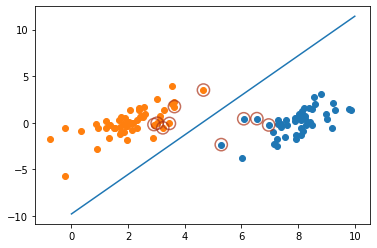

In [8]:
utils.showSMO(dataArr,labelArr, alphas, w, b)

# RBF kernel

gaussian kernel:  
$$
k(x, y) = \exp (\frac {-||x-y||^2}{2\sigma^2})
$$

In [9]:
sigma=1.3
dataArr, labelArr = utils.loadDataSet('testSetRBF.txt')
platt = PlattSMO(200, 0.0001, 100, kernel = kernel.gaussianKernel, sigma=sigma)
oS = platt.train(dataArr, labelArr)
platt.collectCoeff(oS)

In [10]:
# import numpy as np
# b, alphas = oS.b, oS.alphas.T.A[0]
# svInd = alphas > 1e-3
# datMat = np.array(dataArr);
# labelMat = np.array(labelArr).transpose()
# supportVectors = datMat[alphas > 1e-3]
# labelSV = labelMat[svInd]
# utils.testWithFile('testSetRBF.txt', supportVectors, labelSV, alphas, svInd, b,sigma=1.3)

In [11]:
test_X, test_y = utils.loadDataSet('testSetRBF.txt')
predict_y = platt.classify(test_X)
accuracy = utils.calculateAccuray(predict_y, test_y)
print("accuracy = ", accuracy)

accuracy =  1.0


Expect Result:  

accuracy =  1.0  

开启verbose可见到以下打印
there are 12 Support Vectors  
w =  [-4.03558965 -2.68195953]  
b =  -10.97366054782148  
alphas =  [[2.74385992e+00 2.22044605e-16 1.11022302e-15 2.44375793e+01  
  1.14741724e+01 5.77315973e-15 2.42722453e+00 3.33066907e-16  
  4.75813884e+01 4.46799894e+01 1.18641142e+02 8.88178420e-16  
  7.20968395e+01 6.99070950e+00 1.99521964e+01 2.45163542e+01  
  6.87872454e+01 4.44089210e-16]]   
support vectors =    
[-0.557789  0.375797] -1.0  
[-0.475167 -0.346247] -1.0  
[ 0.394164 -0.058217] 1.0  
[-0.403483  0.474466] -1.0  
[-0.012998  0.525985] -1.0  
[0.153738 0.491531] -1.0  
[0.068286 0.392741] 1.0  
[ 0.3843  -0.17657] 1.0  
[-0.307768  0.503038] -1.0  
[-0.448939  0.176725] 1.0  
[0.334204 0.381237] -1.0  
[ 0.541359 -0.205969] -1.0  

In [12]:
test_X, test_y = utils.loadDataSet('testSetRBF2.txt')
predict_y = platt.classify(test_X)
accuracy = utils.calculateAccuray(predict_y, test_y)
print("accuracy = ", accuracy)

accuracy =  0.94


Expect Result:  
accuracy = 0.94

# 手写数字识别

In [13]:
sigma = 10
dataArr,labelArr = utils.loadImages('trainingDigits')
platt = PlattSMO(200, 0.0001, 10, kernel = kernel.gaussianKernel, sigma=sigma)
oS = platt.train(dataArr, labelArr)
platt.collectCoeff(oS)

In [14]:
test_X, test_y = utils.loadImages('trainingDigits')
predict_y = platt.classify(test_X)
accuracy = utils.calculateAccuray(predict_y, test_y)
print("accuracy = ", accuracy)

accuracy =  1.0


Expect Result:  
accuracy =  1.0

In [15]:
test_X, test_y = utils.loadImages('testDigits')
predict_y = platt.classify(test_X)
accuracy = utils.calculateAccuray(predict_y, test_y)
print("accuracy = ", accuracy)

accuracy =  0.9946236559139785


Expect Result:  
accuracy =  0.9946236559139785